# Known bugs
1. For some reason, the markers used to identify the points explored by the different algorithms do not show up in Ackley and Rastrigin (check matplotlib).
2. Maybe use a triangle for the visualization of the best point?

# Continuous optimization
This series of exercises has the objective of comparing the performance of different algorithms on a few continuous test functions. Let's start by taking a look at the test functions considered.

## Test functions
The functions reported here are classical benchmarks used to test optimization algorithms. The first block of code imports libraries that will be used later, and defines a few functions used to visualize the results. The functions below return a reference to the figures themselves, so that we might (later) plot other points on top of them.

**numpy** is a library designed for fast computations over array and matrices. **matplotlib** is the Python module for scientific plotting. **seaborn** is a library for prettyfying plots.

 If you are not very familiar with these modules, understanding the details is not super-important. Just keep in mind that these visualization functions accept as argument any of the functions that we are going to use as optimization benchmarks.

In [1]:
import matplotlib.pyplot as plt # library for scientific plotting
from mpl_toolkits.mplot3d import Axes3D # used for 3d plots
import numpy as np # library with utility functions for numerical computation
import seaborn as sns # library for scientific plotting, but prettier

sns.set_style() # set the seaborn style for plots

# function that creates a figure with the two-dimensional search space of a function
def visualize_2d(function, boundaries, sampling_step=0.01, global_optimum=None) :

  # uniformely sample the only variable of the function
  x = np.arange(min(boundaries), max(boundaries), sampling_step).reshape(-1, 1)
  y = function(x, global_optimum=global_optimum)

  # create a figure and a sub-plot (there is only one sub-plot)
  fig = plt.figure()
  ax = fig.add_subplot(111)

  # plot x, y points, as a continuous line
  ax.plot(x, y)
  ax.set_xlabel("x")
  ax.set_ylabel("y")
  ax.set_title("Plot for function %s, 1D" % function.__name__)

  # return a reference to the figure and the sub-figure
  return fig, ax

# function that visualizes the search space with a figure in three dimensions
def visualize_3d(function, boundaries, sampling_step=0.1, global_optimum=None) :

  # Generate input values for x, y, and calculate z; this part is a bit
  # messy to understand, as it uses a numpy function
  x = np.arange(min(boundaries), max(boundaries), sampling_step)
  y = np.arange(min(boundaries), max(boundaries), sampling_step)
  X, Y = np.meshgrid(x, y)
  Z = function(np.array([X, Y]).T, global_optimum=global_optimum)

  # Create a 3D plot
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  # Plot the surface, using a colormap that employs different colors for different
  # values of the objective function
  cplot = ax.plot_surface(X, Y, Z, cmap='viridis')

  # also set a colorbar for the plot
  fig.colorbar(cplot, ax=ax)

  # Set labels and title
  ax.set_xlabel('x1')
  ax.set_ylabel('x2')
  ax.set_zlabel('f(x1,x2)')
  ax.set_title('Function %s, 2D' % function.__name__)

  #figure = plt.figure()
  #ax = figure.add_subplot(111, projection='3d')
  #ax.plot_surface(X, Y, Z, cmap='viridis', shade='false')

  return fig, ax

# function that visualizes the fitness landscape of a function, seen "from above"
def visualize_3d_from_above(function, boundaries, sampling_step=0.1, global_optimum=None) :

  # sample search space uniformely
  x = np.arange(min(boundaries), max(boundaries), sampling_step)
  y = np.arange(min(boundaries), max(boundaries), sampling_step)
  X, Y = np.meshgrid(x, y)
  Z = function(np.array([X, Y]).T, global_optimum=global_optimum)

  fig = plt.figure()
  ax = fig.add_subplot(111)

  # Create a contour plot
  contour = ax.contour(X, Y, Z, levels=100, cmap='viridis')

  # also set a colorbar for the plot
  fig.colorbar(contour, ax=ax)

  ax.set_title("Function %s, 2D, seen from above" % function.__name__)
  ax.set_xlabel("x1")
  ax.set_xlabel("x2")

  return fig, ax

### Sphere function

\begin{align}
f(\bar{x})=\sum_{i=1}^d{x_i^2}
\end{align}

where

\begin{align}
\bar{x} = \{x_1, x_2, ..., x_N\}
\end{align}

is the input vector in $N$ dimensions. You can also interpret it as a point in $N$ dimensions, or as $N$ separate variables to be optimized.

The sphere function is an easy benchmark, convex and with no local optima. The global optimum is in $\bar{x}_{opt}=\{0,0,...,0\}$, with value $f(\bar{x}_{opt}) = 0.0$ As you can see, the function has an optional parameter, called **global_optimum**. This is an array used to specify a different global optimum. Try setting it to another value (e.g. $\bar{x}_{opt}=\{-2, -2\}$) to see how the function landscape changes.

The easy way to change global_optimum is to specify it in the **visualize_xxx** functions, for example:

```
figure_3d, ax_3d = visualize_3d_from_above(function_sphere, boundaries_sphere, global_optimum=[-2,-2])
```




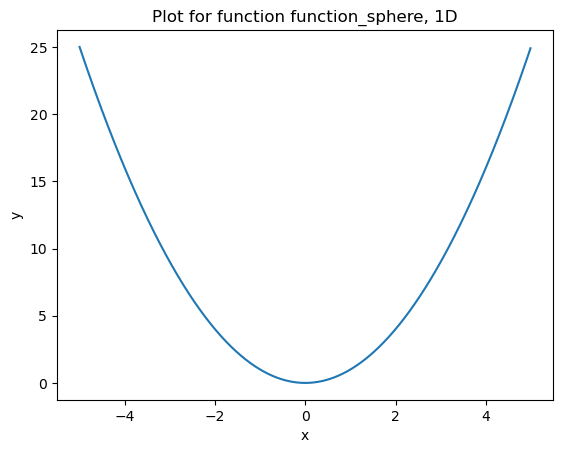

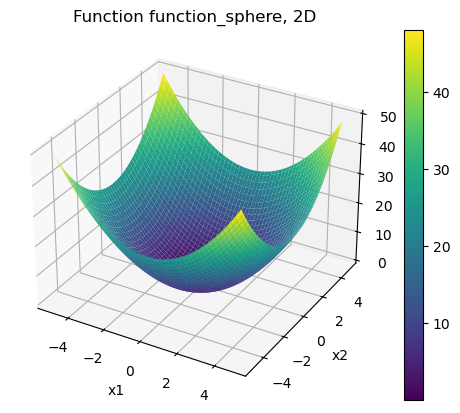

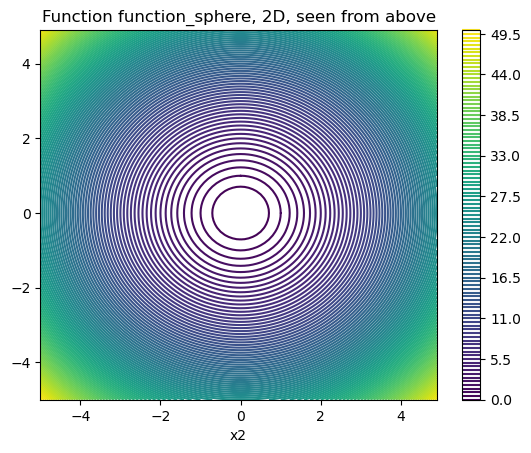

In [2]:
# this function describes an N-dimensional sphere. In 1D, it's an hyperbole.
# 'x' is an N-dimensional numpy array, global_optimum is an array of the same
# size, indicating an (optional) new global optimum
def function_sphere(x, global_optimum=None):
    if not isinstance(x, np.ndarray) :
      x = np.array(x)
    if global_optimum is not None :
        return np.sum( np.square(x - global_optimum), axis=-1)
    else :
        return np.sum(x**2, axis=-1)

boundaries_sphere = [-5, 5]
figure, ax = visualize_2d(function_sphere, boundaries_sphere)
figure_3d, ax_3d = visualize_3d(function_sphere, boundaries_sphere)
figure_3d_above, ax_3d_above = visualize_3d_from_above(function_sphere, boundaries_sphere)

### Styblinski-Tang function
This function is relatively smooth, but also features three strong local optima that can mislead gradient-based optimizers.

\begin{align}
f(\bar{x}) = \frac{1}{2} \sum_{i=1}^{N} \left(x_i^4 - 16x_i^2 + 5x_i\right)
\end{align}

with global optimum

\begin{align}
\bar{x}_{opt} = \{-2.903534, -2.903534, ..., -2.903534\} \\
f(\bar{x}_{opt}) = -39.16599 \cdot d
\end{align}

with $d$ number of dimensions.

Even though the implementation of this function accepts an optional argument **global_optimum**, in this case there is no customizable global optimum.

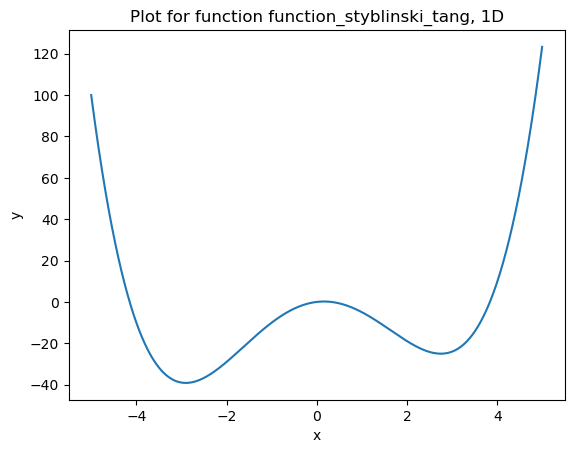

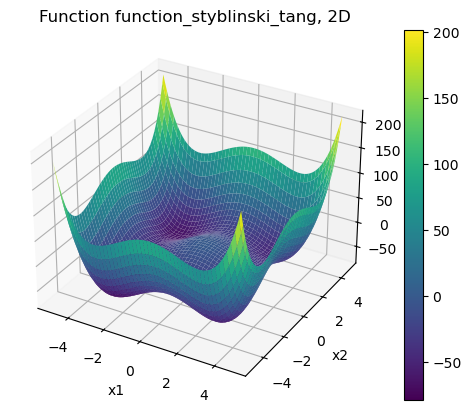

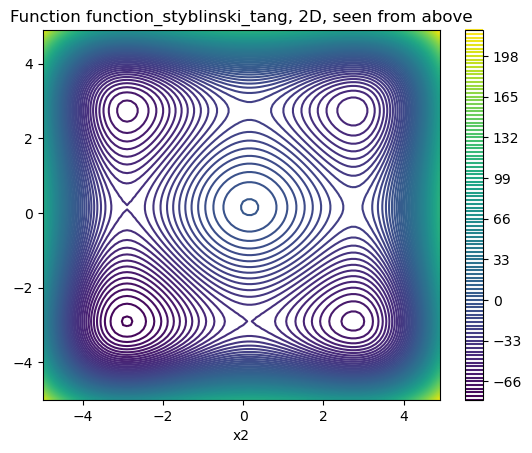

In [3]:
def function_styblinski_tang(x, global_optimum=None):
    if not isinstance(x, np.ndarray) :
      x = np.array(x)
    result = np.sum(x**4 - 16*x**2 + 5*x, axis=-1)
    return result/2.0

boundaries_st = [-5, 5]
figure, ax = visualize_2d(function_styblinski_tang, boundaries_st)
figure_3d, ax_3d = visualize_3d(function_styblinski_tang, boundaries_st)
figure_from_above, ax_from_above = visualize_3d_from_above(function_styblinski_tang, boundaries_st)

### Ackley's function

Differently from the previous functions, Ackley presents a considerable number of local optima (see visualization below), where some optimization algorithms could get stuck.

\begin{align}
f(\bar{x}) = -20 \cdot \exp\left(-0.2 \cdot \sqrt{\frac{1}{N}\sum_{i=1}^{N} x_i^2}\right) - \exp\left(\frac{1}{N}\sum_{i=1}^{N}\cos(2\pi x_i)\right) + 20 + e
\end{align}

with global optimum

\begin{align}
\bar{x}_{opt} = \{0, 0, ..., 0\} \\
f(\bar{x}_{opt}) = 0.0
\end{align}

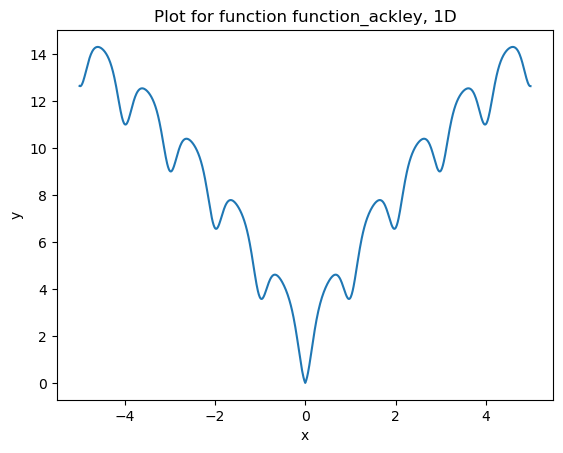

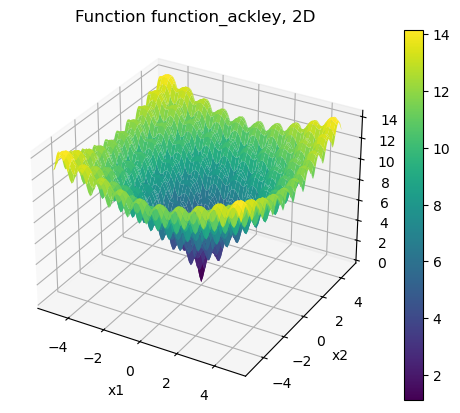

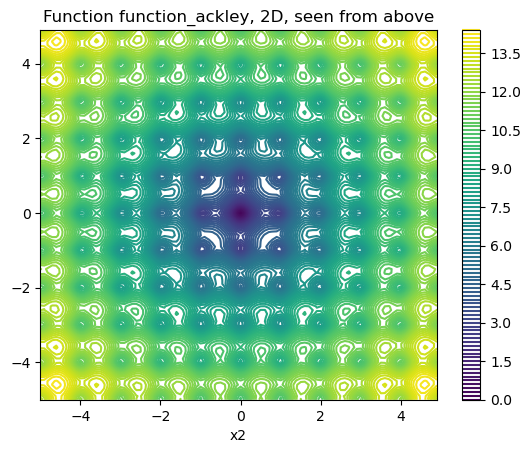

In [4]:
def function_ackley(x, global_optimum=None):
    if not isinstance(x, np.ndarray) :
      x = np.array(x)
    n = x.shape[-1]  # Number of dimensions

    if global_optimum is not None :
        sum_sq_term = np.sum((x-global_optimum)**2, axis=-1)
        cos_term = np.cos(2*np.pi*(x-global_optimum)).sum(axis=-1)
    else :
        sum_sq_term = np.sum(x**2, axis=-1)
        cos_term = np.cos(2*np.pi*x).sum(axis=-1)

    return -20 * np.exp(-0.2 * np.sqrt(sum_sq_term / n)) - np.exp(cos_term / n) + 20 + np.exp(1)

boundaries_ackley = [-5, 5]
figure, ax = visualize_2d(function_ackley, boundaries_ackley)
figure_3d, ax_3d = visualize_3d(function_ackley, boundaries_ackley)
figure_from_above, ax_from_above = visualize_3d_from_above(function_ackley, boundaries_ackley)

### Rastrigin's function

Just like Ackley's, Rastrigin's function has a considerable number of local optima, and they tend to be stronger (e.g. to have better values) than Ackley's.

\begin{align}
f(\bar{x}) = A \cdot N + \sum_{i=1}^{N} \left(x_i^2 - A \cdot \cos(2\pi x_i)\right)
\end{align}

with global optimum

\begin{align}
\bar{x}_{opt} = \{0, 0, ..., 0\} \\
f(\bar{x}_{opt}) = 0.0
\end{align}

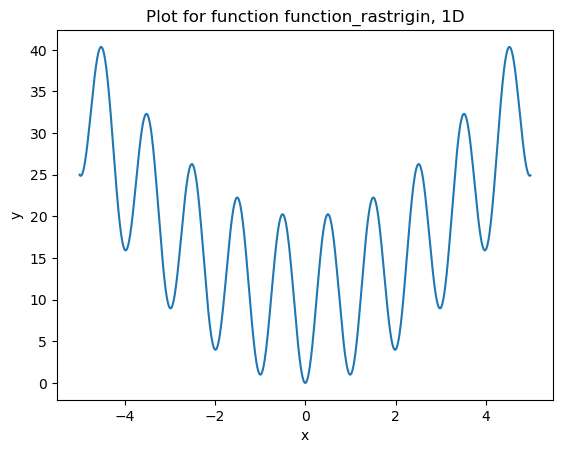

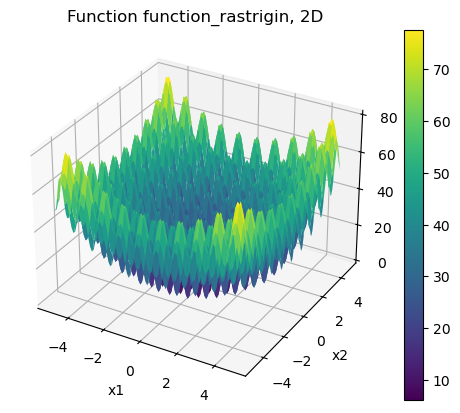

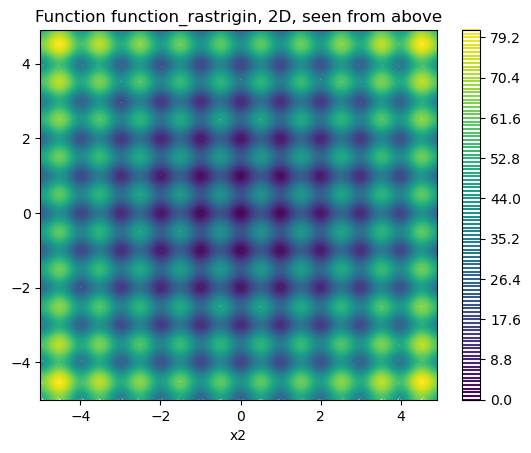

In [5]:
def function_rastrigin(x, global_optimum=None):
    if not isinstance(x, np.ndarray) :
      x = np.array(x)

    A = 10
    n = x.shape[-1]  # Number of elements in the last dimension

    # Calculate the sum along the last dimension
    if global_optimum is not None :
        sum_term = np.sum((x-global_optimum)**2 - A * np.cos(2 * np.pi * (x-global_optimum)), axis=-1)
    else :
        sum_term = np.sum(x**2 - A * np.cos(2 * np.pi * x), axis=-1)

    # Calculate the final result
    result = A * n + sum_term

    return result

boundaries_rastrigin = [-5, 5]
figure, ax = visualize_2d(function_rastrigin, boundaries_rastrigin)
figure_3d, ax_3d = visualize_3d(function_rastrigin, boundaries_rastrigin)
figure_from_above, ax_from_above = visualize_3d_from_above(function_rastrigin, boundaries_rastrigin)

## Continuous optimization algorithms

Now that we've seen a few benchmark functions, it's the moment to test different optimization algorithms.

### Gradient-based optimization algorithms
As described during class, gradient-based optimization algorithms use the derivative(s) of the function to take a decision on where to move in the search space next, trying to move towards the areas of the search space with the steeper slopes.

We are going to use standard algorithms already available in Python packages, that might have slight differences or peculiarities in the implementation, with respect to the descriptions previously provided. The details at this point are not important, what matters is the general idea behind the algorithm.

Let's start with a standard method from the **scipy.optimize** library, the default used when the **scipy.optimize.minimize** function is called. Here below is just a wrapper that also collects the information about the intermediate points visited by the algorithm before stopping in the best one it can find.

In [6]:
from scipy.optimize import minimize

def gradient_based_optimization(function, initial_point, boundaries) :

  points_explored = [np.array(initial_point)]

  # this 'callback' function is a utility function that is called at every
  # iteration of the algorithm; here we are using it to store the points
  # in the search space that have been evaluated by the algorithm
  def callback(xk, points_explored=points_explored) :
      points_explored.append(xk)
      return

  # we need to prepare the boundaries in the format required by the function below
  bounds = [boundaries] * len(initial_point)
  result = minimize(function, initial_point, bounds=bounds, callback=callback)

  return result.x, points_explored

The method includes a few choices that the user can make, among which the starting point of the optimization. Take a look at the code below, and check what happens when you change the starting point. What can you notice? Does the algorithm always find the global optimum (in the case of Styblinski-Tang in 2D, the optimum in the bottom left)? Why?

Best function value obtained after exploring 5 points: -0.0000


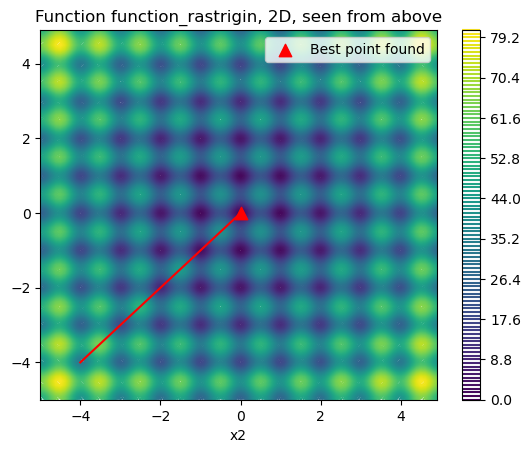

In [23]:
starting_point = [-4, -4]
best_point, points_explored = gradient_based_optimization(function_rastrigin, starting_point, boundaries_rastrigin)
figure_from_above, ax_from_above = visualize_3d_from_above(function_rastrigin, boundaries_rastrigin)
ax_from_above.plot([x[0] for x in points_explored], [x[1] for x in points_explored], color='red')
ax_from_above.scatter(best_point[0], best_point[1], color='red', marker='^', sizes=[80], label="Best point found", zorder=2)
ax_from_above.legend(loc='best')
print("Best function value obtained after exploring %d points: %.4f" % (len(points_explored), function_styblinski_tang(best_point)))

## Stochastic algorithms
Here below are the implementations of the two types of stochastic optimization algorithms that we introduced, Basin-Hopping and Evolutionary Algorithms. Note that they accept more (optional) parameters than just the starting point and the number of iterations, the most important of which is the **random seed**, that ensures the reproducibility of the pseudo-random number generation. All optional parameters have default values, but feel free to modify them and see what happens!

### Basin-hopping
This implementation of Basin-Hopping uses a standard version from the scipy library. The extra arguments are the maximum number of iterations and the step size. Try modifying them to see what happens. Can you make the algorithm find the best optimum?

Note: in this case, the **points_visited** list only contains the end point after the gradient descent, without the intermediate locations visited. Lots of points might overlap, if the algorithm always ended up in the same local minimum. You can also print the **points_visited** list to have an idea.

Best function value obtained after exploring 102 points: -50.0589


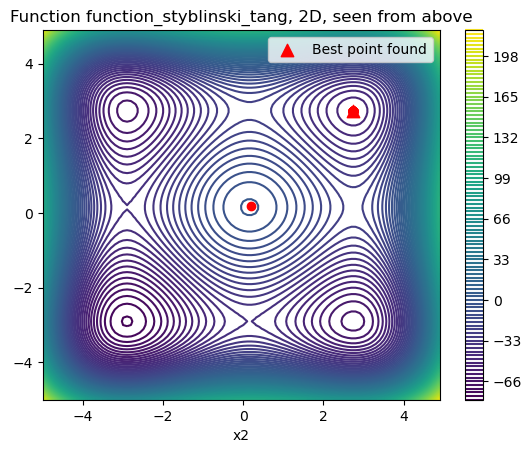

In [8]:
from scipy.optimize import basinhopping
def basinhopping_optimization(function, starting_point, boundaries, number_of_iterations=100, step_size=0.5, random_seed=42) :

    points_explored = [starting_point]

    def callback_function(x, f, accept) :
        points_explored.append(x)
        return

    result = basinhopping(function, starting_point, niter=number_of_iterations, callback=callback_function, stepsize=step_size, seed=random_seed)
    best_point = result.x

    return best_point, points_explored

starting_point = [0.2, 0.2]
best_point, points_explored = basinhopping_optimization(function_styblinski_tang, starting_point, boundaries_st)
figure_from_above, ax_from_above = visualize_3d_from_above(function_styblinski_tang, boundaries_st)
ax_from_above.scatter([x[0] for x in points_explored], [x[1] for x in points_explored], color='red')
ax_from_above.scatter(best_point[0], best_point[1], color='red', marker='^', sizes=[80], label="Best point found")
ax_from_above.legend(loc='best')
print("Best function value obtained after exploring %d points: %.4f" % (len(points_explored), function_styblinski_tang(best_point)))
#print("Points visited:", points_explored)

### Evolutionary algorithms
Here below are two different stochastic algorithms belonging to the category of Evolutionary Algorithms, population-based methods that maintain an archive of candidate solutions and sample the search space much more intensively than gradient-based techniques.

The evolutionary algorithm is a classic, run-of-the-mill EA. CMA-ES ([Covariance Matrix Adaptation Evolution Strategy](https://en.wikipedia.org/wiki/CMA-ES)) tries to limit the number of evaluations by exploiting more information from the function's landscape.

In both cases, try to modify the parameters and see if you can make them find (or get closer to) the global optimum.

In [9]:
# the code here might look a bit complex, but don't worry too much about it
!pip install git+https://github.com/aarongarrett/inspyred.git --quiet

import inspyred
import random

def generator(random, args) :
    boundaries = args["boundaries"]
    n_dimensions = args["n_dimensions"]
    return [random.uniform(boundaries[0], boundaries[1]) for i in range(0, n_dimensions)]

def observer(population, num_generations, num_evaluations, args) :
    print("Iteration %d (%d evaluations): best point %s, function value %.4f" %
          (num_generations, num_evaluations, str(population[0].candidate), population[0].fitness))
    points_explored = args["points_explored"]
    for individual in population :
        points_explored.append(individual.candidate)
    return

def evaluator(candidates, args) :
    function = args["function"]
    fitness_values = []
    for c in candidates :
        fitness_values.append(function(c))

    return fitness_values

def evolutionary_optimization(function, starting_point, boundaries, random_seed=42, population_size=5, max_evaluations=50) :

    points_explored = []
    prng = random.Random()
    prng.seed(random_seed)
    ea = inspyred.ec.EvolutionaryComputation(prng)
    ea.observer = observer
    ea.replacer = inspyred.ec.replacers.plus_replacement
    ea.selector = inspyred.ec.selectors.tournament_selection
    ea.terminator = inspyred.ec.terminators.evaluation_termination
    ea.variator = [inspyred.ec.variators.gaussian_mutation, inspyred.ec.variators.crossovers.n_point_crossover]

    final_population = ea.evolve(
        pop_size=population_size, num_selected=population_size,
        generator=generator, evaluator=evaluator, seeds=[starting_point],
        max_evaluations=max_evaluations, maximize=False,
        # all variables set below end up inside the 'args' dictionary
        n_dimensions=len(starting_point),
        boundaries=boundaries,
        function=function,
        points_explored=points_explored,
        )

    best_point = final_population[0].candidate

    return best_point, points_explored

Iteration 0 (5 evaluations): best point [0.2, 0.2], function value 0.3616
Iteration 1 (9 evaluations): best point [-2.2497068163088074, -2.7678926185117723], function value -72.1683
Iteration 2 (13 evaluations): best point [-2.2497068163088074, -2.7678926185117723], function value -72.1683
Iteration 3 (17 evaluations): best point [-2.2497068163088074, -2.7678926185117723], function value -72.1683
Iteration 4 (21 evaluations): best point [-2.2497068163088074, -2.7678926185117723], function value -72.1683
Iteration 5 (25 evaluations): best point [-2.2497068163088074, -2.7678926185117723], function value -72.1683
Iteration 6 (29 evaluations): best point [-2.2497068163088074, -2.7678926185117723], function value -72.1683
Iteration 7 (33 evaluations): best point [-2.778773094850676, -2.7678926185117723], function value -77.7705
Iteration 8 (37 evaluations): best point [-2.778773094850676, -2.7678926185117723], function value -77.7705
Iteration 9 (41 evaluations): best point [-2.778773094850

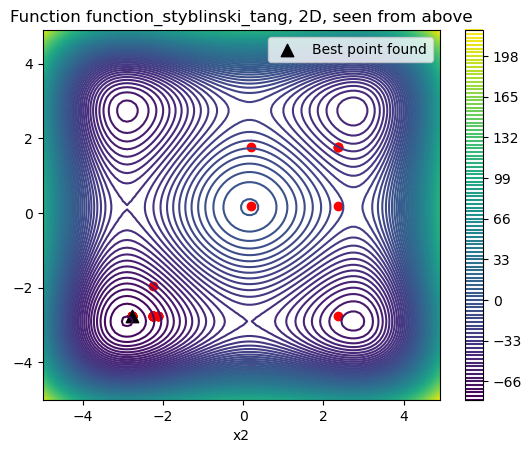

In [10]:
starting_point = [0.2, 0.2]
best_point, points_explored = evolutionary_optimization(function_styblinski_tang, starting_point, boundaries_st)
print(boundaries_st)
figure_from_above, ax_from_above = visualize_3d_from_above(function_styblinski_tang, boundaries_st)
ax_from_above.scatter([x[0] for x in points_explored], [x[1] for x in points_explored], color='red')
ax_from_above.scatter(best_point[0], best_point[1], color='black', marker='^', sizes=[80], label="Best point found")
ax_from_above.legend(loc='best')
print("Best function value obtained after exploring %d points: %.4f" % (len(points_explored), function_styblinski_tang(best_point)))

(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=42, Mon May 20 23:19:19 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 3.431212644501688e-01 1.0e+00 1.23e-02  1e-02  1e-02 0:00.0
    2     12 3.054654706129304e-01 1.3e+00 2.09e-02  2e-02  3e-02 0:00.0
    3     18 2.407547965301959e-01 1.7e+00 3.28e-02  4e-02  4e-02 0:00.0
   92    552 -5.005889331056788e+01 1.7e+00 1.00e-05  6e-09  8e-09 0:00.1
[-5, 5]
Best function value obtained after exploring 552 points: -50.0589


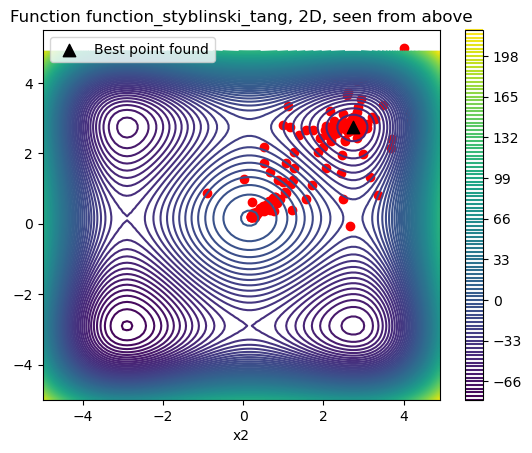

In [11]:
!pip install cma --quiet
import cma
def cmaes_optimization(function, starting_point, boundaries, random_seed=42, population_size=None, sigma=1e-2) :

    options = {'bounds' : list(boundaries), 'seed' : random_seed, 'popsize' : population_size}

    points_explored = []
    cmaes = cma.CMAEvolutionStrategy(starting_point, sigma, options)
    while not cmaes.stop() :
        solutions = cmaes.ask()
        cmaes.tell(solutions, [function(x) for x in solutions])
        cmaes.disp()
        points_explored.extend(solutions)

    return cmaes.result[0], points_explored

starting_point = [0.2, 0.2]
best_point, points_explored = cmaes_optimization(function_styblinski_tang, starting_point, boundaries_st)
print(boundaries_st)
figure_from_above, ax_from_above = visualize_3d_from_above(function_styblinski_tang, boundaries_st)
ax_from_above.scatter([x[0] for x in points_explored], [x[1] for x in points_explored], color='red')
ax_from_above.scatter(best_point[0], best_point[1], color='black', marker='^', sizes=[80], label="Best point found")
ax_from_above.legend(loc='best')
print("Best function value obtained after exploring %d points: %.4f" % (len(points_explored), function_styblinski_tang(best_point)))

# Further testing

## Experiment on more functions
Now that you have run different algorithms, give them a try on the different functions that are listed at the top.
1. What algorithm do you think would obtain the best results on a convex function like Sphere? Why?
2. And on more complex functions with multiple local optima, like Ackley and Rastrigin?
3. Try to increase the number of dimensions for the test functions (by simply adding dimensions to the starting point, e.g. [0, 0, 0]. What can you notice? Are the algorithms still as efficient as they were in lower dimensions?

In [12]:
# here is a cell of code to play with, you can add more by clicking on "+ Code" on the top left (if on Google Colaboratory)

## Implement your own algorithms

I would encourage you to code three simple strategies for optimization:
1. An **"exhaustive" search**, where you can sample the search space systematically, using a grid, and returning the best point found at the end.
2. A completely **random search**, where you randomly sample the search space a given number of times, and return the best value.
3. A **stochastic hill climber**: start from a random point in the search space, and for a given number of times, randomly sample the search space in a new point, at a small distance from the current point. If the new point has a better value than the current point, replace the current point with the new one; otherwise, keep the current one. Then, keep going and return the best point found at the end.

For all the stochastic algorithms, remember to use a **random seed** as an argument, to initialize the random number generator, so that you can reproduce a run.

Try to follow the template, so that each function will return the coordinates of the best points, plus a list containing the coordinates of all points explored during the search.

Compare them with the other algorithms. How do they perform?

In [13]:
def exhaustive_search(boundaries, step_size) :

  # for each dimension in the boundaries, get

  return best_point, points_explored

In [14]:
def random_search(boundaries, number_of_iterations, random_seed=42) :

  # for the specified number of iterations :
    # draw a random point within the boundaries
    # compare it with the best point found so far
    # if it is better, keep it as the best point

  return best_point, points_explored

In [15]:
def stochastic_hill_climber(starting_point, boundaries, number_of_iterations, random_seed=42) :

  # first point is the starting point specified by the user
  # evaluate starting point

  # for the specified number of iterations:
    # try to sample the search space **nearby**, obtaining a new point
    # the point has to be within the boundaries
    # evaluate the new point
    # if the new point is better, it replaces the current best point
    # otherwise, discard the new point and keep the old best
    # loop

  return best_point, points_explored

Now, test the algorithms that you developed on the test functions above. You can plot the sequence of points they explored using the following template:

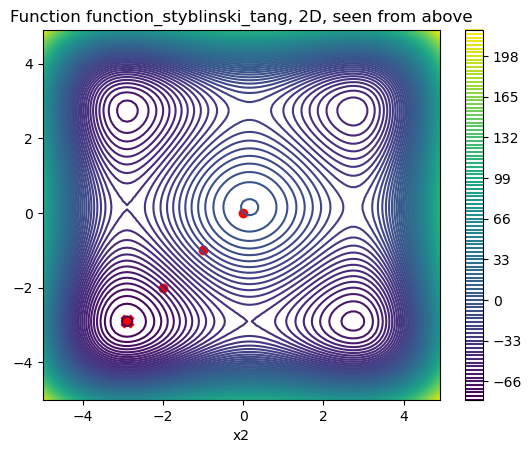

In [16]:
# this is just an example, with the "best point" here
best_point = [-2.903534,-2.903534]
# and a list of points explored
points_explored = [[0,0], [-1,-1], [-2,-2], best_point]
figure_from_above, ax_from_above = visualize_3d_from_above(function_styblinski_tang, boundaries_st)
# 'scatter' visualizes points, while 'plot' joins them in a single line
ax_from_above.scatter([x[0] for x in points_explored], [x[1] for x in points_explored], color='red')
#ax_from_above.plot([x[0] for x in points_explored], [x[1] for x in points_explored], color='red')
ax_from_above.scatter(best_point[0], best_point[1], color='red', marker='X', sizes=[80])